**Studierende:**

- 1938814, Wahlfach
- 6923946, Zusatzfach

**Verwendete Bibliotheken**

- matplotlib, Version 3.2.1
- numpy, Version 1.18.2
- pandas, Version 1.0.0
- seaborn, Version 0.10.0
- scikit-learn, Version 0.22.2.post1

# Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

pd.set_option('expand_frame_repr', True)
pd.set_option('max_colwidth',100)

# later used for training models in a deterministic way
random_state = 43

# later used for evaluating models
kfold = KFold(n_splits=10, shuffle=True, random_state=random_state)

In [2]:
data = pd.read_csv('SetFiltered.csv', delimiter=';')

In [3]:
data

MSZoning  LotArea Neighborhood BldgType  OverallQual  OverallCond  \
0         RL     9590       Timber     1Fam            7            5   
1         RL    12256      NoRidge     1Fam            8            5   
2         RL    12108      Edwards   Duplex            4            4   
3         RL     7500       Sawyer     1Fam            5            5   
4         RM     6000      OldTown   2fmCon            4            4   
..       ...      ...          ...      ...          ...          ...   
895       RL     8750      CollgCr     1Fam            7            5   
896       RL     8064        NAmes     1Fam            5            7   
897       RL    13005       NWAmes     1Fam            7            7   
898       RL     9375      CollgCr     1Fam            8            5   
899       RL     9135      CollgCr     1Fam            7            5   

     YearBuilt  YearRemodAdd RoofStyle  TotalBsmtSF HeatingQC CentralAir  \
0         2003          2003     Gable          868        Ex          Y   
1         1994          1995     Gable         1463        Ex          Y   
2         1955          1955     Gable         1440        TA          N   
3         1963          1963     Gable         1040        Fa          Y   
4         1953          1953     Gable          936        TA          N   
..         ...           ...       ...          ...       ...        ...   
895       1996          1996     Gable          880        Ex          Y   
896       1949          2006     Gable          672        Ex          Y   
897       1980          1980     Gable          845        TA          Y   
898       2002          2002     Gable         1284        Ex          Y   
899       2002          2003     Gable         1536        Ex          Y   

     GrLivArea  TotRmsAbvGrd  GarageCars  YrSold  SalePrice  
0         1146             6           2    2007     187500  
1         2622             9           2    2010     325000  
2         1440             8           0    2008     118000  
3         1040             5           1    2010     133000  
4          936             4           2    2009      93000  
..         ...           ...         ...     ...        ...  
895       1716             7           2    2009     191000  
896        924             6           2    2007     122900  
897       2353            10           2    2009     260000  
898       2169             7           2    2007     228500  
899       1536             7           2    2008     214000  

[900 rows x 17 columns]

In [4]:
dictionary = {
    'MSZoning': 'Identifies the general zoning classification of the sale',
    'LotArea': 'Lot size in square feet',
    'Neighborhood': 'Physical locations within Ames city limits',
    'BldgType': 'Type of dwelling',
    'OverallQual': 'Rates the overall material and finish of the house',
    'OverallCond': 'Rates the overall condition of the house',
    'YearBuilt': 'Original construction date',
    'YearRemodAdd': 'Remodel date (same as construction date if no remodeling or additions)',
    'RoofStyle': 'Type of roof',
    'TotalBsmtSF': 'Total square feet of basement area',
    'HeatingQC': 'Heating quality and condition',
    'CentralAir': 'Central air conditioning',
    'GrLivArea': 'Above grade (ground) living area square feet',
    'TotRmsAbvGrd': 'Total rooms above grade (does not include bathrooms)',
    'GarageCars': 'Size of garage in car capacity',
    'YrSold': 'Year sold (YYYY)',
    'SalePrice': 'Sale price in $',
    'A': 'Agriculture',
    'C (all)': 'Commercial',
    'FV': 'Floating Village Residential',
    'I': 'Industrial',
    'RH': 'Residential High Density',
    'RL': 'Residential Low Density',
    'RP': 'Residential Low Density Park ',
    'RM': 'Residential Medium Density',
    'Blmngtn': 'Bloomington Heights',
    'Blueste': 'Bluestem',
    'BrDale': 'Briardale',
    'BrkSide': 'Brookside',
    'ClearCr': 'Clear Creek',
    'CollgCr': 'College Creek',
    'Crawfor': 'Crawford',
    'Edwards': 'Edwards',
    'Gilbert': 'Gilbert',
    'IDOTRR': 'Iowa DOT and Rail Road',
    'MeadowV': 'Meadow Village',
    'Mitchel': 'Mitchell',
    'NAmes': 'North Ames',
    'NoRidge': 'Northridge',
    'NPkVill': 'Northpark Villa',
    'NridgHt': 'Northridge Heights',
    'NWAmes': 'Northwest Ames',
    'OldTown': 'Old Town',
    'SWISU': 'South & West of Iowa State University',
    'Sawyer': 'Sawyer',
    'SawyerW': 'Sawyer West',
    'Somerst': 'Somerset',
    'StoneBr': 'Stone Brook',
    'Timber': 'Timberland',
    'Veenker': 'Veenker',
    '1Fam': 'Single-family Detached',
    '2fmCon': 'Two-family Conversion; originally built as one-family dwelling',
    'Duplex': 'Duplex',
    'TwnhsE': 'Townhouse End Unit',
    'Twnhs': 'Townhouse Inside Unit',
    '10': 'Very Excellent',
    '9': 'Excellent',
    '8': 'Very Good',
    '7': 'Good',
    '6': 'Above Average',
    '5': 'Average',
    '4': 'Below Average',
    '3': 'Fair',
    '2': 'Poor',
    '1': 'Very Poor',
    'Flat': 'Flat',
    'Gable': 'Gable',
    'Gambrel': 'Gabrel (Barn)',
    'Hip': 'Hip',
    'Mansard': 'Mansard',
    'Shed': 'Shed',
    'Ex': 'Excellent',
    'Gd': 'Good',
    'TA': 'Average/Typical',
    'Fa': 'Fair',
    'Po': 'Poor',
    'N': 'No',
    'Y': 'Yes'
}

numeric_categories = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'YrSold', 'SalePrice']
non_numeric_categories = list(set(data) - set(numeric_categories))

In [5]:
sns.set_style('whitegrid')

def analyze(cat, data=data):
    df = data[cat].to_frame()
    
    if cat in numeric_categories:     
        # Used for displaying two plots in the same line
        fig, ax =plt.subplots(1,2, figsize=(18,4))

        # Plot hist without kde
        sns.distplot(df, kde=False, axlabel=cat, ax=ax[0])
        # Plot boxplot
        sns.boxplot(df, ax=ax[1])
        plt.title(dictionary[cat])
        plt.show(fig)

        # Calculate all the important parameters
        mean = df.mean()[0]
        median = df.median()[0]
        mode = df.mode()[cat][0]
        min_ = df.min()[0]
        max_ = df.max()[0]
        lower_quartile = df.quantile(.25)[0]
        upper_quartile = df.quantile(.75)[0]
        iqr = upper_quartile - lower_quartile
        lower_whisker = max(min_, lower_quartile - 1.5 * iqr)
        upper_whisker = min(max_, upper_quartile + 1.5 * iqr)
        between_whiskers = df[(df >= lower_whisker) & (df <= upper_whisker)].count()[0]
        
        quantiles = pd.DataFrame(df.quantile([.001, .01, .1, .25, .5, .75, .9, .99, .999]))
        
        variance = df.var()[0]

        print(f'{"Mean:":<17}{mean:<13.2f}{"Median:":<17}{median:<10.2f}{"Mode:":<10}{mode:.2f}')
        print(f'{"Min:":<17}{min_:<13.2f}{"Max:":<17}{max_:.2f}')
        print(f'{"Variance:":<17}{variance:<13.2f}{"S-Deviation:":<17}{variance**(1/2):.2f}')
        print(f'{"Lower whisker:":<17}{lower_whisker:<13.2f}{"Upper whisker:":<17}{upper_whisker}')
        print(f'{"Lower quartile:":<17}{lower_quartile:<13.2f}{"Upper quartile:":<17}{upper_quartile:<10}{"IQR:":<10}{iqr}')
        print(f'{"Data points between whiskers:":<30}{between_whiskers} ({between_whiskers / len(df)})')
        print(f'Quantiles:')  
          
    else:    
        # Plot data
        fig = sns.catplot(x=cat, kind='count', data=df, label=dictionary[cat], order = df[cat].value_counts().index)
        # Rotate labels on x axis
        fig.set_xticklabels(rotation=65, horizontalalignment='right')
        # Add title to plot
        fig.fig.set_size_inches(10,3.5)
        plt.title(dictionary[cat])
        plt.show()

        for zone, value in df[cat].value_counts().iteritems():
            print(f"{zone} = {dictionary[zone]} = {value}")
    
    # Print a seperator line
    print('_____________________________________________________________________')

In [6]:
def analyze_with_hue(cat, hue):
    df = data[cat].to_frame()
    
    if cat in numeric_categories:    
        fig = sns.FacetGrid(data, hue=hue)
        fig = fig.map(sns.distplot, cat)
        fig.fig.set_size_inches(10,3.5)
        fig.add_legend()
        plt.show(fig)
          
    elif cat in non_numeric_categories:
        fig = sns.countplot(x=cat, hue=hue, data=data)
        plt.show()

        for zone, value in df[cat].value_counts().iteritems():
            print(f"{zone} = {dictionary[zone]} = {value}")

In [7]:
def scatter_plot(cat1, cat2):
    df = pd.concat([data[cat1], data[cat2]], axis=1)
    df.plot.scatter(x=cat2, y=cat1, ylim=(0,800000))

# Part 1: Analysis

In [8]:
data.isnull().sum().max()

0

Overall, the dataset has a very good quality. There is no missing data and there seem to be no datasets with incorrect data or data that needs to be normalized first. In the following, every category in the dataset is analyzed. Later, a short look on correlations is given.

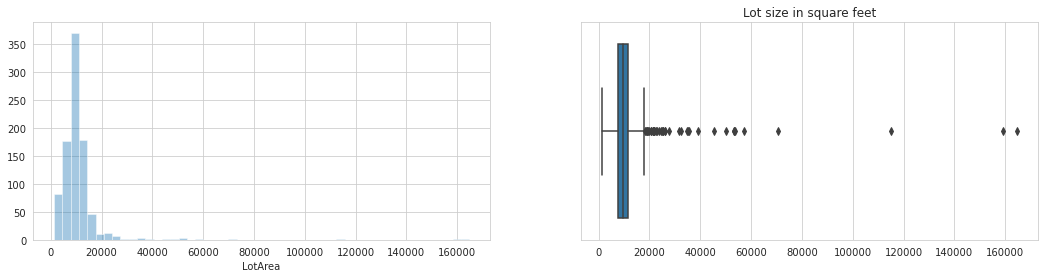

Mean:            10629.82     Median:          9475.00   Mode:     9600.00
Min:             1300.00      Max:             164660.00
Variance:        98944578.29  S-Deviation:     9947.09
Lower whisker:   1300.00      Upper whisker:   18101.625
Lower quartile:  7432.25      Upper quartile:  11700.0   IQR:      4267.75
Data points between whiskers: 856 (0.9511111111111111)
Quantiles:
_____________________________________________________________________


In [9]:
analyze(numeric_categories[0])

50 percent of the houses in the dataset have a lot size between 7432 and 11700 sq. ft. Over 95 percent are between the two whiskers of the boxplot at 1030 and 18102 sq. ft. Although there are houses with lot sizes of over 18102 sq. ft., information about these is sparse. Therefore, predictions for this range will probvably not be very accurate. The data points for these houses could be considered to be outliers, but are correct values and will therefore probably not decrease the performance of a predicting model. This will be determined later by trying predcitions with and without these data points.

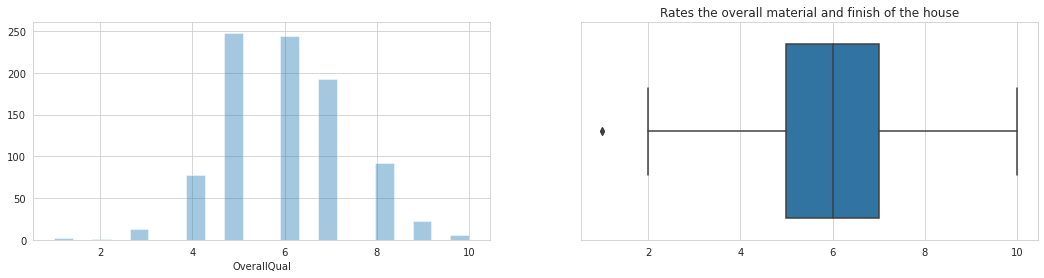

Mean:            6.01         Median:          6.00      Mode:     5.00
Min:             1.00         Max:             10.00
Variance:        1.79         S-Deviation:     1.34
Lower whisker:   2.00         Upper whisker:   10
Lower quartile:  5.00         Upper quartile:  7.0       IQR:      2.0
Data points between whiskers: 898 (0.9977777777777778)
Quantiles:
_____________________________________________________________________


In [10]:
analyze(numeric_categories[1])

Values of overall quality are centered around six. 50 percent of values are between five and seven, while all values except two are between the two whiskers of the boxplot at 2 and 10. Therefore, predictions will probably be good for the entire range of ratings.

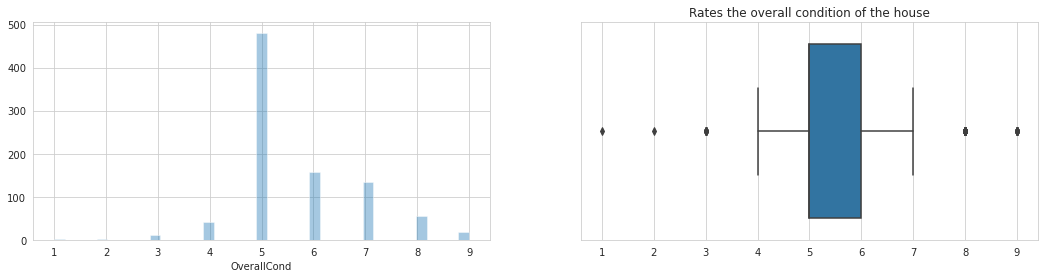

Mean:            5.65         Median:          5.00      Mode:     5.00
Min:             1.00         Max:             9.00
Variance:        1.33         S-Deviation:     1.15
Lower whisker:   3.50         Upper whisker:   7.5
Lower quartile:  5.00         Upper quartile:  6.0       IQR:      1.0
Data points between whiskers: 814 (0.9044444444444445)
Quantiles:
_____________________________________________________________________


In [11]:
analyze(numeric_categories[2])

The dataset mainly contains houses with conditions between four and seven (90 %). There is some data for houses with an overall condition of eight or nine, but only very few data points for houses with an overall condition below four. Predictions in this range will likely not be accurate.

In [12]:
analyze(numeric_categories[3])

Mean:            1969.35      Median:          1971.00   Mode:     2004.00
Min:             1872.00      Max:             2009.00
Variance:        874.57       S-Deviation:     29.57
Lower whisker:   1885.50      Upper whisker:   2009
Lower quartile:  1953.00      Upper quartile:  1998.0    IQR:      45.0
Data points between whiskers: 893 (0.9922222222222222)
Quantiles:
_____________________________________________________________________


Most of the houses have been built between 1885 and 2009. There is a strong growth in houses built per year starting in 1980. On the other hand, there are very few datasets with houses built before 1900.

In [13]:
analyze(numeric_categories[4])

Mean:            1984.19      Median:          1993.00   Mode:     1950.00
Min:             1950.00      Max:             2009.00
Variance:        407.85       S-Deviation:     20.20
Lower whisker:   1950.00      Upper whisker:   2009
Lower quartile:  1966.00      Upper quartile:  2002.0    IQR:      36.0
Data points between whiskers: 900 (1.0)
Quantiles:
_____________________________________________________________________


Similar to the date of construction, there is a strong growth in houses remodeled per year starting in 1980. Also, the data is strongly skewed right. This is due to the fact that houses can not be remodeled before there construction date and houses without any remodeling have there construction date as the remodeling date. Overall, there is sufficient data for houses with remodeling dates in the whole range from 1950 to 2009.

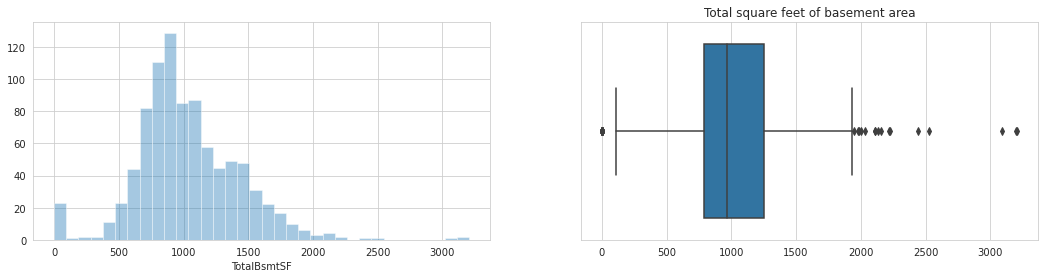

Mean:            1028.17      Median:          968.50    Mode:     864.00
Min:             0.00         Max:             3206.00
Variance:        162424.88    S-Deviation:     403.02
Lower whisker:   101.38       Upper whisker:   1938.375
Lower quartile:  790.25       Upper quartile:  1249.5    IQR:      459.25
Data points between whiskers: 861 (0.9566666666666667)
Quantiles:
_____________________________________________________________________


In [14]:
analyze(numeric_categories[5])

Most houses have a basement with around 101.375 to 1938.375 sq. ft. Hereby 50 percent are in the range between 790.25 and 1249.5 sq. ft. There are some outliers above the upper whisker, however most of them are below the lower whisker at zero sq. ft. This is due to the fact that some houses do not have a basement. The performance of the prediction model might be improved by changing the representation of houses without basements, for example by introducing a new  boolean dimension. This has to be evaluated later.

In [15]:
analyze(numeric_categories[6])

Mean:            1487.44      Median:          1443.50   Mode:     864.00
Min:             334.00       Max:             4316.00
Variance:        254609.32    S-Deviation:     504.59
Lower whisker:   334.00       Upper whisker:   2722.125
Lower quartile:  1102.75      Upper quartile:  1750.5    IQR:      647.75
Data points between whiskers: 882 (0.98)
Quantiles:
_____________________________________________________________________


Most buildings in the dataset have a living area above ground of between 334 and 2722 sq. ft. Two percent of the houses in the dataset have a larger living area above ground, thus predictions for this range might not be good.

In [16]:
analyze(numeric_categories[7])

Mean:            6.42         Median:          6.00      Mode:     6.00
Min:             2.00         Max:             12.00
Variance:        2.57         S-Deviation:     1.60
Lower whisker:   2.00         Upper whisker:   10.0
Lower quartile:  5.00         Upper quartile:  7.0       IQR:      2.0
Data points between whiskers: 886 (0.9844444444444445)
Quantiles:
_____________________________________________________________________


Most houses have between three and ten rooms. Only very few houses have more than ten rooms (< 2 %). For those the prediction model might not be accurate.

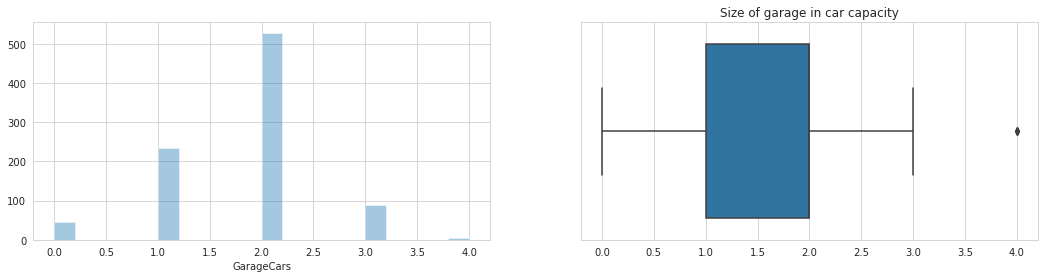

Mean:            1.75         Median:          2.00      Mode:     2.00
Min:             0.00         Max:             4.00
Variance:        0.51         S-Deviation:     0.72
Lower whisker:   0.00         Upper whisker:   3.5
Lower quartile:  1.00         Upper quartile:  2.0       IQR:      1.0
Data points between whiskers: 896 (0.9955555555555555)
Quantiles:
_____________________________________________________________________


In [17]:
analyze(numeric_categories[8])

The car capacity for most houses ranges from zero to three cars. Only four data points have more car capacity in the garage. For those data points predictions might be inaccurate.

In [18]:
analyze(numeric_categories[9])

Mean:            2007.90      Median:          2008.00   Mode:     2009.00
Min:             2006.00      Max:             2010.00
Variance:        1.71         S-Deviation:     1.31
Lower whisker:   2006.00      Upper whisker:   2010
Lower quartile:  2007.00      Upper quartile:  2009.0    IQR:      2.0
Data points between whiskers: 900 (1.0)
Quantiles:
_____________________________________________________________________


The distribution of the "Year sold" dimension is very uniform. Therefore, predictions for houses with values across the entire board will be good.

In [19]:
analyze(numeric_categories[10])

Mean:            176184.45    Median:          161000.00 Mode:     140000.00
Min:             39300.00     Max:             755000.00
Variance:        5099742641.46S-Deviation:     71412.48
Lower whisker:   39300.00     Upper whisker:   317500.0
Lower quartile:  130000.00    Upper quartile:  205000.0  IQR:      75000.0
Data points between whiskers: 861 (0.9566666666666667)
Quantiles:
_____________________________________________________________________


50 % of the houses in the dataset have a sale price between 130 k and 205 k USD. 96 % of houses have a sale price between the two whiskers of the boxplot at 39 k and 318 k USD. The data for houses with sale prices above 318 k $ is very sparse.

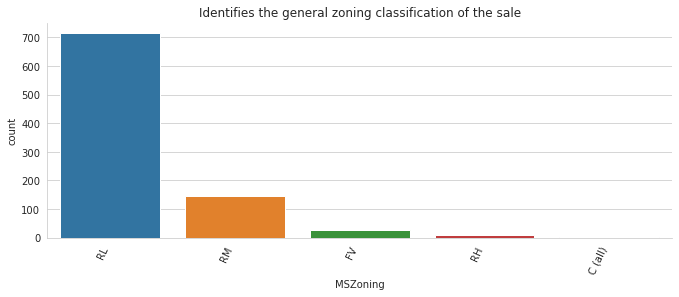

RL = Residential Low Density = 716
RM = Residential Medium Density = 145
FV = Floating Village Residential = 28
RH = Residential High Density = 10
C (all) = Commercial = 1
_____________________________________________________________________


In [20]:
analyze(non_numeric_categories[0])

Most houses in the dataset are single-family detached houses.

In [21]:
analyze(non_numeric_categories[1])

NAmes = North Ames = 150
CollgCr = College Creek = 103
OldTown = Old Town = 71
Edwards = Edwards = 53
Sawyer = Sawyer = 52
Gilbert = Gilbert = 47
NWAmes = Northwest Ames = 46
BrkSide = Brookside = 41
NridgHt = Northridge Heights = 39
SawyerW = Sawyer West = 37
Crawfor = Crawford = 34
Somerst = Somerset = 34
Mitchel = Mitchell = 33
NoRidge = Northridge = 26
Timber = Timberland = 21
IDOTRR = Iowa DOT and Rail Road = 21
SWISU = South & West of Iowa State University = 18
ClearCr = Clear Creek = 17
StoneBr = Stone Brook = 13
MeadowV = Meadow Village = 12
BrDale = Briardale = 9
Blmngtn = Bloomington Heights = 9
Veenker = Veenker = 8
NPkVill = Northpark Villa = 5
Blueste = Bluestem = 1
_____________________________________________________________________


Most houses have central air conditioning. (Not to be expected in Germany)

In [22]:
analyze(non_numeric_categories[2])

Gable = Gable = 708
Hip = Hip = 171
Flat = Flat = 7
Gambrel = Gabrel (Barn) = 7
Mansard = Mansard = 5
Shed = Shed = 2
_____________________________________________________________________


Most houses have a gable roof. Some houses have a hip roof. Very few houses have a flat, gabrel, mansard or shed roof. Predictions for houses with such roofs might be inaccurate.

In [23]:
analyze(non_numeric_categories[3])

Ex = Excellent = 448
TA = Average/Typical = 264
Gd = Good = 161
Fa = Fair = 26
Po = Poor = 1
_____________________________________________________________________


There is only one house with poor heating quality and condition, so predictions for similar houses will be hard. It is also noticeable that there are more houses with average heating quality and condition then good heating quality and condition (even though most houses have excellent heating quality and condiiton) - the data is only ordered after count.

In [24]:
analyze(non_numeric_categories[4])

1Fam = Single-family Detached = 759
TwnhsE = Townhouse End Unit = 68
Duplex = Duplex = 29
Twnhs = Townhouse Inside Unit = 27
2fmCon = Two-family Conversion; originally built as one-family dwelling = 17
_____________________________________________________________________


Rainbow! Predictions for neighborhoods with a count of under ten will most probably be inaccurate. 

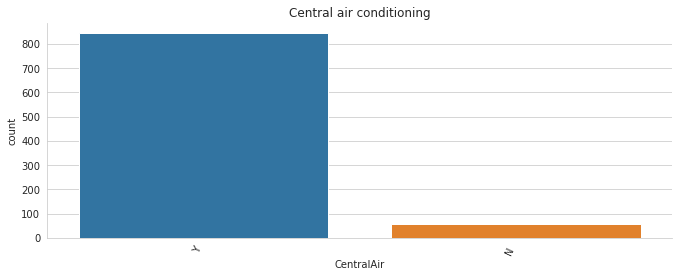

Y = Yes = 845
N = No = 55
_____________________________________________________________________


In [25]:
analyze(non_numeric_categories[5])

Most houses in the dataset are located in residential areas with low density. Predictions for houses in residential areas with high density will be inaccurate, predictions for houses in commercial areas even more.

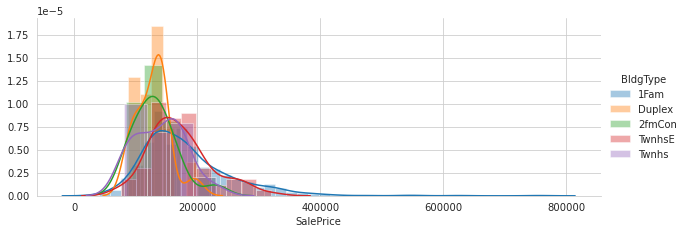

In [26]:
for each in ['BldgType','CentralAir','RoofStyle']:
    analyze_with_hue('SalePrice', each)

Here, three more plots for analysis are shown.

In [27]:
correlation = data.corr()

# Set figure size
fig, ax = plt.subplots(figsize=(10,10))

# Create heatmap of correlations
heatmap = sns.heatmap(correlation, 
            xticklabels = correlation.columns,
            yticklabels = correlation.columns,
            cmap = 'RdBu_r',
            annot = True,
            linewidth = 1,
            ax = ax)

# fix for mpl bug that cuts off top/bottom of seaborn viz (from https://github.com/mwaskom/seaborn/issues/1773)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show(heatmap) # ta-da!

This plot shows the correlation coefficients between all numeric categories.

Strong correlations (> 0.7):

- Sale price / Overall quality
- Sale price / Living area above ground
- Total rooms above ground / living area above ground

Medium correlations (> 0.5):

- Sale price / Total basement area
- Sale price / total rooms above ground
- Sale price / Garage car capacity
- Garage car capacity / Overall quality
- Garage car capacity / Year built
- Living area above ground / Overall quality
- Total basement area / Overall quality
- Year of remodel / Overall quality
- Year of remodel / Year built (Houses without remodelling have their year built as year of remodel &rarr; correlation is misleading)

In [28]:
# Plot all categories with all categories
sns.pairplot(data)
plt.show()

This plot shows each numerical category against each other numerical category.

Natural connections:

- Year built / year remodeled &rarr; Houses can't be remodeled before they are built
- Total basement area / Living area above ground &rarr; The living area above ground most often is at least as large as the basement area

The correlations seen in the plot above can also be seen in this plot.

# Part 2: Regression - Sale Price Prediction

Mean:            176184.45    Median:          161000.00 Mode:     140000.00
Min:             39300.00     Max:             755000.00
Variance:        5099742641.46S-Deviation:     71412.48
Lower whisker:   39300.00     Upper whisker:   317500.0
Lower quartile:  130000.00    Upper quartile:  205000.0  IQR:      75000.0
Data points between whiskers: 861 (0.9566666666666667)
Quantiles:
_____________________________________________________________________


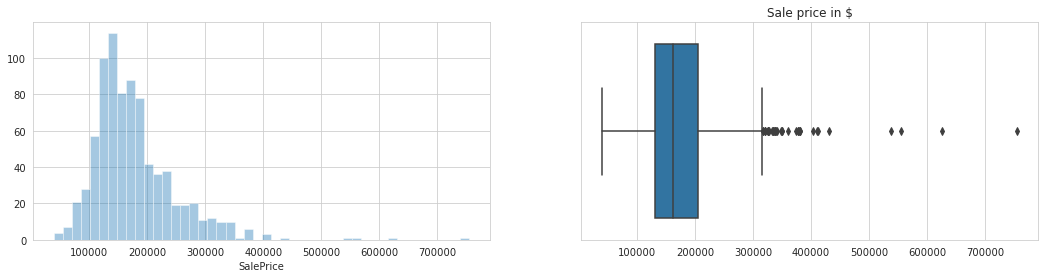

Mean:            176629.85    Median:          161500.00 Mode:     140000.00
Min:             39300.00     Max:             755000.00
Variance:        5106036553.53S-Deviation:     71456.54
Lower whisker:   39300.00     Upper whisker:   316000.0
Lower quartile:  131000.00    Upper quartile:  205000.0  IQR:      74000.0
Data points between whiskers: 773 (0.9543209876543209)
Quantiles:
_____________________________________________________________________


Mean:            172175.92    Median:          150000.00 Mode:     100000.00
Min:             84500.00     Max:             475000.00
Variance:        5081777863.06S-Deviation:     71286.59
Lower whisker:   84500.00     Upper whisker:   318125.0
Lower quartile:  125000.00    Upper quartile:  202250.0  IQR:      77250.0
Data points between whiskers: 86 (0.9555555555555556)
Quantiles:
_____________________________________________________________________


In [29]:
analyze('SalePrice', data)

for train, test in kfold.split(data):
    analyze('SalePrice', data.iloc[train])
    analyze('SalePrice', data.iloc[test])
    break

As defined at the top of this notebook, we use 10-fold cross validation to compare the different models. The first plot shows the sale price in the complete data set, the second one shows the sale price in the training part of the first fold, and the third one shows the sale price in the testing part of the first fold. Since the training part represents the complete dataset quite good and the testing part still contains most of the range of the complete dataset, this 10-fold cross validation should be adequate for comparing the different models.

In [30]:
reg = LinearRegression()

def get_sample(indices, cat):
    return data.iloc[indices][cat].to_numpy()

def get_score(cats:list):
    scores = []
    for train, test in kfold.split(data):        
        x_train = get_sample(train, cats)
        y_train = get_sample(train, 'SalePrice')
        x_test = get_sample(test, cats)
        y_test = get_sample(test, 'SalePrice')

        reg.fit(x_train,y_train)
        scores.append(reg.score(x_test, y_test))        

    return scores

numeric_categories = ['GrLivArea', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageCars', 'YrSold']
cats = []
previous_max_scores = [0]
diffs = []
diffs_stds = []

while len(cats) < len(numeric_categories):
    max_cat, max_scores = None, [0]
    for cat in set(numeric_categories)-set(cats):
        scores = get_score([*cats,cat])        
        if np.mean(scores) > np.mean(max_scores):
            max_cat, max_scores = cat, scores           
        
    diffs.append(np.mean(max_scores)-np.mean(previous_max_scores))
    diffs_stds.append(np.std(np.array(max_scores)-np.mean(previous_max_scores)))
    cats.append(max_cat)
    previous_max_scores = max_scores
    
for cat, diff, std in zip(cats, diffs, diffs_stds):
    print(f'{cat:<25}{diff:<15.5f}{std/np.abs(diff):<15.5f}')    
    
print(f'Score: {np.mean(previous_max_scores):>25.5f}{np.std(previous_max_scores):>15.5f}')

OverallQual              0.60350        0.08464        
GrLivArea                0.14003        0.23512        
TotalBsmtSF              0.04862        0.55524        
YearBuilt                0.01915        1.25301        
OverallCond              0.01635        1.50812        
LotArea                  0.00853        3.66749        
GarageCars               0.00623        4.97413        
TotRmsAbvGrd             0.00275        11.55003       
YearRemodAdd             0.00019        170.60408      
YrSold                   -0.00021       152.44996      
Score:                   0.84513        0.03242


First, we use linear regression to predict the sale price. During each iteration we look for the category with the highest score increment and add it to the list. This gives us the best possible path. The first column shows the category added in each iteration. The second column shows the improvement of the mean R² using 10-fold cross-validation compared to the previous iteration. The third column shows the normed standard deviation of the difference of all R² scores compared to the mean R² score of the previous iteration. Using this method we can conclude that TotRmsAbvGrd, YrSold and YearRemodAdd do not benefit the predictor much and thus can be excluded. Using the remaining categories we now train a linear regression model on the complete data set. This set of categories will also be used for all later classifiers.

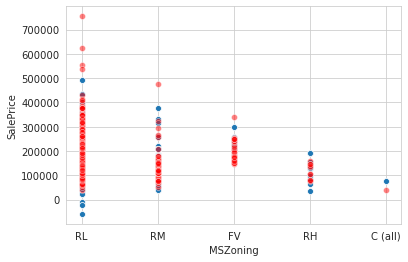

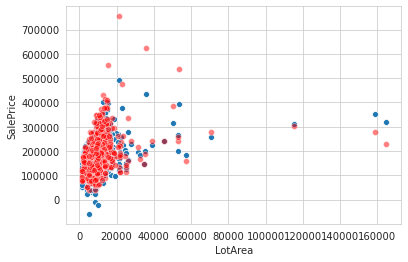

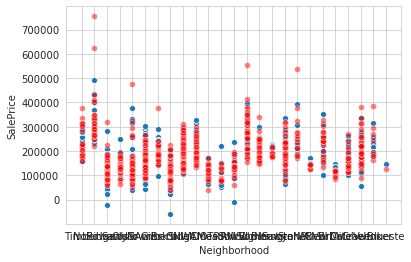

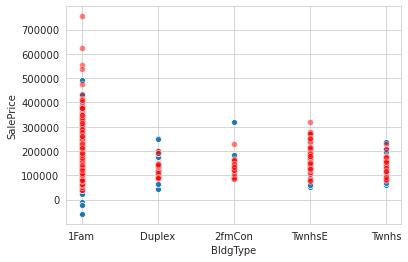

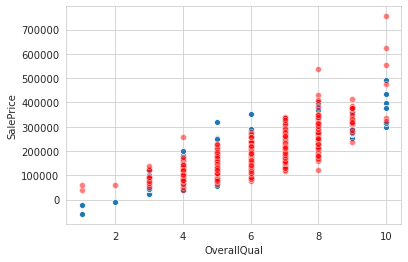

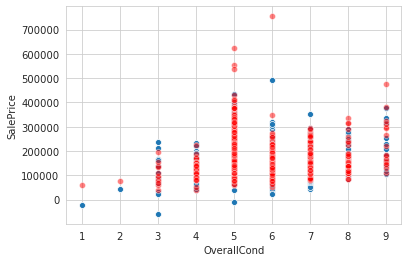

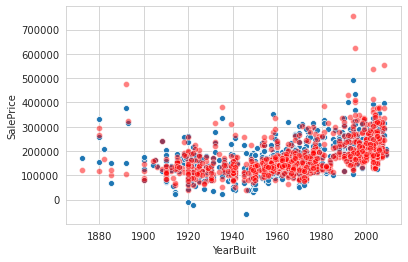

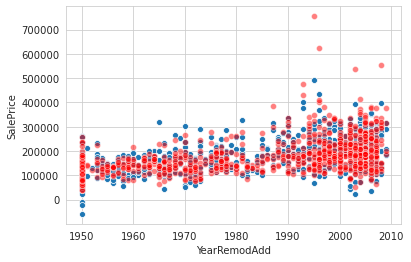

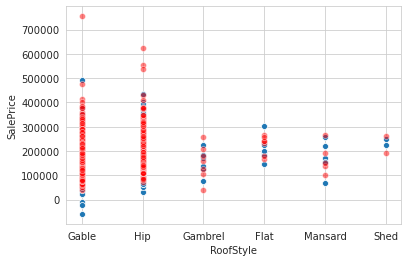

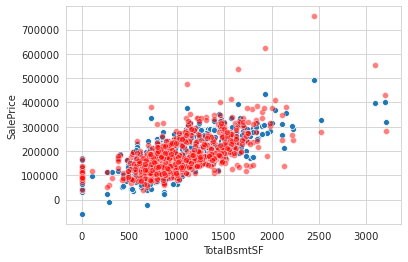

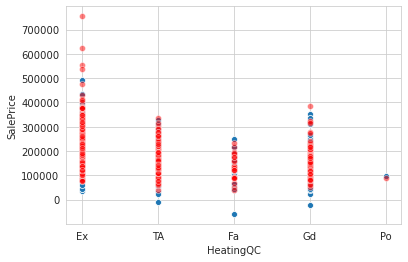

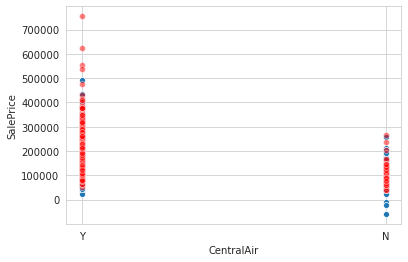

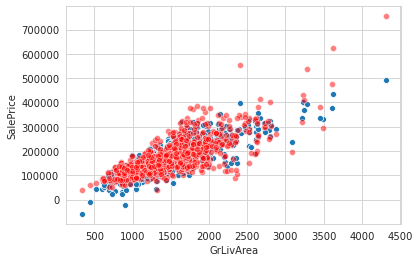

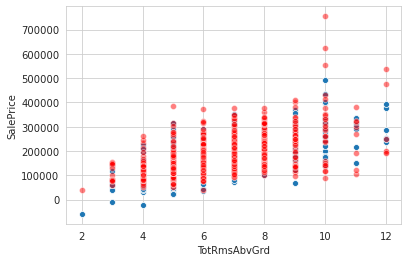

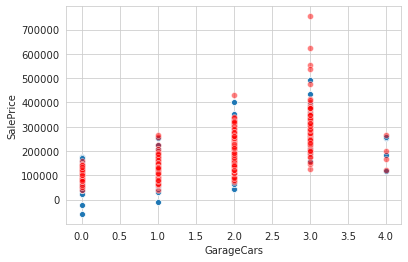

In [31]:
x_cats = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'OverallCond', 'LotArea', 'GarageCars']

reg.fit(data[x_cats], data['SalePrice'])
y_predict = reg.predict(data[x_cats])

for cat in data:
    sns.scatterplot(data[cat], y_predict)
    sns.scatterplot(data[cat], data['SalePrice'],alpha=.5,color='red')
    plt.show()

These plots show the predicted sale prices in blue and the real sale price in red with the trained linear regressor. 

In [32]:
for cat, coef in zip(x_cats, reg.coef_):
    print(f'{cat:<25}{coef:<15.2f}')
    
print(f'{"Constant term":<25}{reg.intercept_:<15.2f}')

OverallQual              14497.08       
GrLivArea                60.17          
TotalBsmtSF              37.90          
YearBuilt                484.15         
OverallCond              8397.73        
LotArea                  0.77           
GarageCars               9216.24        
Constant term            -1064724.87    


In [33]:
display(data.iloc[68])

MSZoning             RM
LotArea            8546
Neighborhood    Edwards
BldgType           1Fam
OverallQual           4
OverallCond           5
YearBuilt          2003
YearRemodAdd       2004
RoofStyle         Gable
TotalBsmtSF        1121
HeatingQC            Ex
CentralAir            Y
GrLivArea          1121
TotRmsAbvGrd          5
GarageCars            2
YrSold             2010
SalePrice        140000
Name: 68, dtype: object

In [34]:
calculation = ' + '.join(f'{reg.coef_[i]:.2f} * {data.iloc[68][cat]:.2f}' for i, cat in enumerate(x_cats))
price = sum(reg.coef_[i] * data.iloc[68][cat] for i, cat in enumerate(x_cats)) + reg.intercept_
print(f'price = {calculation} + {reg.intercept_:.2f} = {price:.2f}')

price = 14497.08 * 4.00 + 60.17 * 1121.00 + 37.90 * 1121.00 + 484.15 * 2003.00 + 8397.73 * 5.00 + 0.77 * 8546.00 + 9216.24 * 2.00 + -1064724.87 = 139995.65


The three cells above show the coefficients of the fitted linear regression model and its constant term, one sample from the data set and the calculation of the predicted sales price for the sample. The predicted sales price is 139995.65 while the actual sales price is 140000. Looking at the coefficients, inference is possbile as well: e.g. if a house was built one year later than another one it is predicted to be sold for 484.15 dollars more.

In [35]:
models = {
    'Linear': LinearRegression(),
    'Gradient boosting': GradientBoostingRegressor(random_state=random_state),
    'Gradient boosting with polyn. feat.': make_pipeline(PolynomialFeatures(2), GradientBoostingRegressor(random_state=random_state)),
    'Multi-layer perceptron': make_pipeline(StandardScaler(), MLPRegressor(random_state=random_state, activation='relu', solver='lbfgs', hidden_layer_sizes=(40,), max_iter=10000)),
    'Lasso': make_pipeline(StandardScaler(), LassoCV(cv=3, random_state=random_state)),
    'K-nearest neighbors': make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5, weights='distance')),
    'Random forest': RandomForestRegressor(max_depth=11, random_state=random_state, n_estimators=20),
    'Stacked': StackingRegressor(estimators=[
        ('Linear', LinearRegression()),
        ('Gradient boosting', make_pipeline(PolynomialFeatures(2), GradientBoostingRegressor(random_state=random_state))),
        ('Lasso', make_pipeline(StandardScaler(), LassoCV(cv=3, random_state=random_state))),
        ('K-nearest neighbors', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5, weights='distance'))),
        ('Random forest', RandomForestRegressor(max_depth=11, random_state=random_state, n_estimators=20))
    ])
}
max_name_len = max(map(len, models.keys()))

x_cats = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'OverallCond', 'LotArea', 'GarageCars']
y_cat = 'SalePrice'

scores = []
for name, model in models.items():
    scores_model = []
    for i_train, i_test in kfold.split(data):
        x_train = data.iloc[i_train][x_cats]
        y_train = data.iloc[i_train][y_cat]
        x_test = data.iloc[i_test][x_cats]
        y_test = data.iloc[i_test][y_cat]
        model.fit(x_train, y_train)
        score = model.score(x_test, y_test)
        scores_model.append(score)
    
    scores.append(scores_model)
    print(f'{name:>{max_name_len}}: R^2 mean = {np.mean(scores_model):.5f}, R^2 std = {np.std(scores_model):.5f}')
    
g = sns.boxplot(x=list(models.keys()), y=scores)
g.set(ylabel='R^2')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

                             Linear: R^2 mean = 0.84240, R^2 std = 0.03097
                  Gradient boosting: R^2 mean = 0.89057, R^2 std = 0.02993
Gradient boosting with polyn. feat.: R^2 mean = 0.89857, R^2 std = 0.01698
             Multi-layer perceptron: R^2 mean = 0.86065, R^2 std = 0.07611
                              Lasso: R^2 mean = 0.84354, R^2 std = 0.03011
                K-nearest neighbors: R^2 mean = 0.86049, R^2 std = 0.03816
                      Random forest: R^2 mean = 0.86507, R^2 std = 0.03900
                            Stacked: R^2 mean = 0.90250, R^2 std = 0.01948


Here, we compare all our different models for predicting the sale price. Stacked regression and gradient boosting with polynomial features have the best R² scores with 0.90247 and 0.89857 respectively. However, the stacked regression has a higher complexity since it consists of six  different regressors including gradient boosting (the five in the dictionary plus ridge regression as a final estimator). Therefore, it takes much longer to compute while only giving a minimal improvement over gradient boosting. Furthermore the standard deviation is worse. Hence, we have decided to use the most stable regressor: gradient boosting with polynomial features. This model is already optimzied, since we decided to add the polynomial features. Having evaluated the best parameters using 10-fold cross validation, we can use these parameters to train a final model on the complete dataset.

In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

x_cats = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'OverallCond', 'LotArea', 'GarageCars']
y_cat = 'SalePrice'


def validate_regressor(filename):
    data = pd.read_csv(filename, sep=';')
    regressor = train_regressor('SetFiltered.csv')
    validate_regressor_with_data(regressor, data)


def validate_regressor_with_data(regressor, data):
    x_true = data[x_cats]
    y_true = data[y_cat]
    y_pred = regressor.predict(x_true)
    print_regressor_metrics(y_true, y_pred)


def print_regressor_metrics(y_true, y_pred):
    metrics = {
        'R^2': 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2),
        'MSE': np.mean((y_true - y_pred) ** 2),
        'RMSE': np.sqrt(np.mean((y_true - y_pred) ** 2)),
        'MAPE': np.mean(np.abs(y_true - y_pred) / np.abs(y_true)),
        'MAX': np.max(np.abs(y_true - y_pred)),
    }
    max_metric_name_len = max(map(len, metrics.keys()))
    for metric, value in metrics.items():
        print(f'{metric:>{max_metric_name_len}}: {value:>22.10f}')


def train_regressor(filename):
    data = pd.read_csv(filename, sep=';')
    x_train = data[x_cats]
    y_train = data[y_cat]
    model = make_pipeline(PolynomialFeatures(2), GradientBoostingRegressor(random_state=43))
    model.fit(x_train, y_train)
    return model

This is the self-contained function for part 2. Call `validate_regressor` with the filename of testing data to get some metrics of the fitted model on the testing data, as shown below (in this case with the training data itself).

In [37]:
validate_regressor('SetFiltered.csv')

 R^2:           0.9698849991
 MSE:   153408110.9264121354
RMSE:       12385.8027970097
MAPE:           0.0587763253
 MAX:       47587.7967826457


# Part 3: Classification - Central Air Prediction

In [38]:
model = DecisionTreeClassifier(random_state=random_state, class_weight={0: n_one, 1: n_zero})
model.fit(data[x_cats], data[y_cat])
plot_tree(model)
plt.show()

NameError: name 'n_one' is not defined

First, we train a simple decision tree on the data. The trained decision tree is shown here and also in the attached PDF. For example, given a house with 0 places for cars in the garage, a living area above ground of 800 sq. ft., and an overall quality of 4, it is predicted that it has no central air conditioning.

                K-nearest neighbors: fps mean = 4.1, fns mean = 0.5, f1 mean = 0.97319
                  Gradient boosting: fps mean = 3.7, fns mean = 1.5, f1 mean = 0.96924
Gradient boosting with polyn. feat.: fps mean = 3.3, fns mean = 1.9, f1 mean = 0.96902
                     Support vector: fps mean = 5.5, fns mean = 0.0, f1 mean = 0.96835
                      Decision tree: fps mean = 3.1, fns mean = 2.4, f1 mean = 0.96725


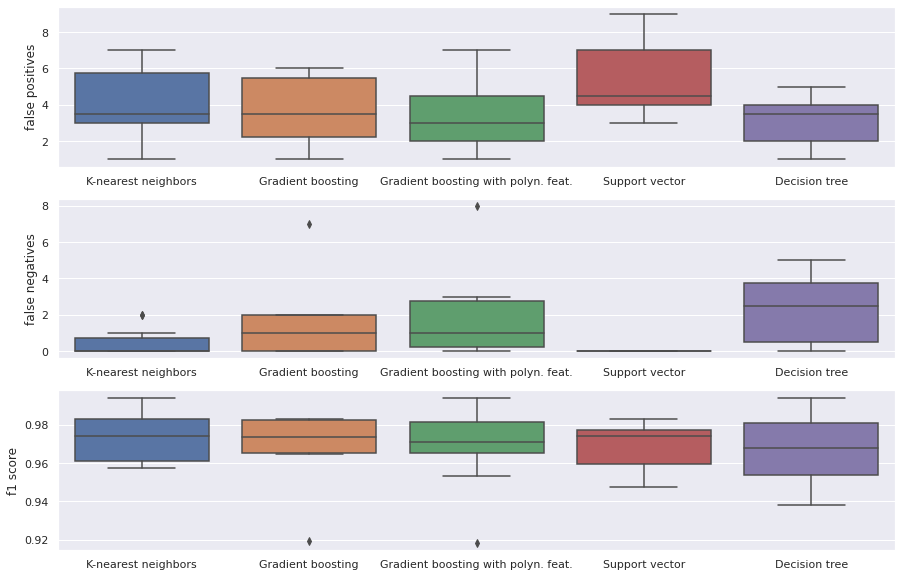

In [39]:
data.CentralAir = data.apply(lambda row: 1 if row.CentralAir == 'Y' else 0, axis=1)
n_zero = len(data[data.CentralAir == 0])
n_one = len(data[data.CentralAir == 1])

models = {
    'K-nearest neighbors': make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5, weights='distance')),
    'Gradient boosting': GradientBoostingClassifier(random_state=random_state),
    'Gradient boosting with polyn. feat.': make_pipeline(PolynomialFeatures(2), GradientBoostingClassifier(random_state=random_state)),
    'Support vector': SVC(random_state=random_state),
    'Decision tree': DecisionTreeClassifier(random_state=random_state, class_weight={0: n_one, 1: n_zero})
}
max_name_len = max(map(len, models.keys()))

x_cats = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'OverallCond', 'LotArea', 'GarageCars']
y_cat = 'CentralAir'

fps = []
fns = []
f1s = []

for name, model in models.items():
    fps_moodel = []
    fns_model = []
    f1s_model = []

    for i_train, i_test in kfold.split(data):
        x_train = data.iloc[i_train][x_cats]
        y_train = data.iloc[i_train][y_cat]
        x_test = data.iloc[i_test][x_cats]
        y_test = data.iloc[i_test][y_cat]

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        fps_moodel.append(fp)
        fns_model.append(fn)
        f1s_model.append(f1_score(y_test, y_pred))

    fps.append(fps_moodel)
    fns.append(fns_model)
    f1s.append(f1s_model)

    print(f'{name:>{max_name_len}}: fps mean = {np.mean(fps_moodel):.1f}, fns mean = {np.mean(fns_model):.1f}, f1 mean = {np.mean(f1s_model):.5f}')

sns.set()
fig, ax = plt.subplots(3, 1)
sns.boxplot(x=list(models.keys()), y=fps, ax=ax[0])
ax[0].set(ylabel='false positives')
sns.boxplot(x=list(models.keys()), y=fns, ax=ax[1])
ax[1].set(ylabel='false negatives')
sns.boxplot(x=list(models.keys()), y=f1s, ax=ax[2])
ax[2].set(ylabel='f1 score')
plt.gcf().set_size_inches(15, 10)
plt.show()

Here, we compare all our different models for predicting whether a house has central air conditioning. The support vector machine and gradient boosting with polynomial features both perform very good, but gradient boosting has an outlier in terms of false negatives. Furthermore, k-nearest neighbors has the best F1-score with 0.97319. Thus, we choose k-nearest neighbors for this part. The neighbors parameter of the model is already optimized using 10-fold cross validation. We can now train a final model on the complete dataset.

In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

x_cats = ['OverallQual', 'GrLivArea', 'TotalBsmtSF',
          'YearBuilt', 'OverallCond', 'LotArea', 'GarageCars']
y_cat = 'CentralAir'


def validate_classifier(filename):
    data = pd.read_csv(filename, sep=';')
    classifier = train_classifier('SetFiltered.csv')
    validate_classifier_with_data(classifier, data)


def validate_classifier_with_data(classifier, data):
    x_true = data[x_cats]
    y_true = data[y_cat]
    y_pred = classifier.predict(x_true)
    print_classifier_metrics(y_true, y_pred)


def print_classifier_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics = {
        'Accuracy': (tn + tp) / len(y_pred),
        'False positives': fp,
        'False negatives': fn,
    }
    max_metric_name_len = max(map(len, metrics.keys()))
    for metric, value in metrics.items():
        print(f'{metric:>{max_metric_name_len}}: {value:>22.10f}')


def train_classifier(filename):
    data = pd.read_csv(filename, sep=';')
    x_train = data[x_cats]
    y_train = data[y_cat]
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(
        n_neighbors=5, weights='distance'))
    model.fit(x_train, y_train)
    return model

This is the self-contained function for part 2. Call `validate_classifier` with the filename of testing data to get some metrics of the fitted model on the testing data, as shown below (in this case with the training data itself).

In [41]:
validate_classifier('SetFiltered.csv')

       Accuracy:           1.0000000000
False positives:           0.0000000000
False negatives:           0.0000000000
